### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as ssb
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML

# Int cufflinks
# making all charts public and setting a global theme
cf.set_config_file(theme='solar',offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set matplotlib in Darkmode
plt.style.use('dark_background')

### 01. Exploring the Dataset

In [2]:
# Loading data using pandas
path = './diabetes.csv'

In [3]:
def load_dataset(path:str) -> pd:
    return pd.read_csv(path)

In [4]:
dataset = load_dataset(path)

In [5]:
# Check the number of rows and columns in the dataset 
# dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Shows if there are any entries that are NA or NAN
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Plotting data
def plot_data(dataset):
    """Plot out all the data from the dataset in different histograms"""
    dataset.hist(bins=50, figsize = (20,15))
    plt.show()
    return


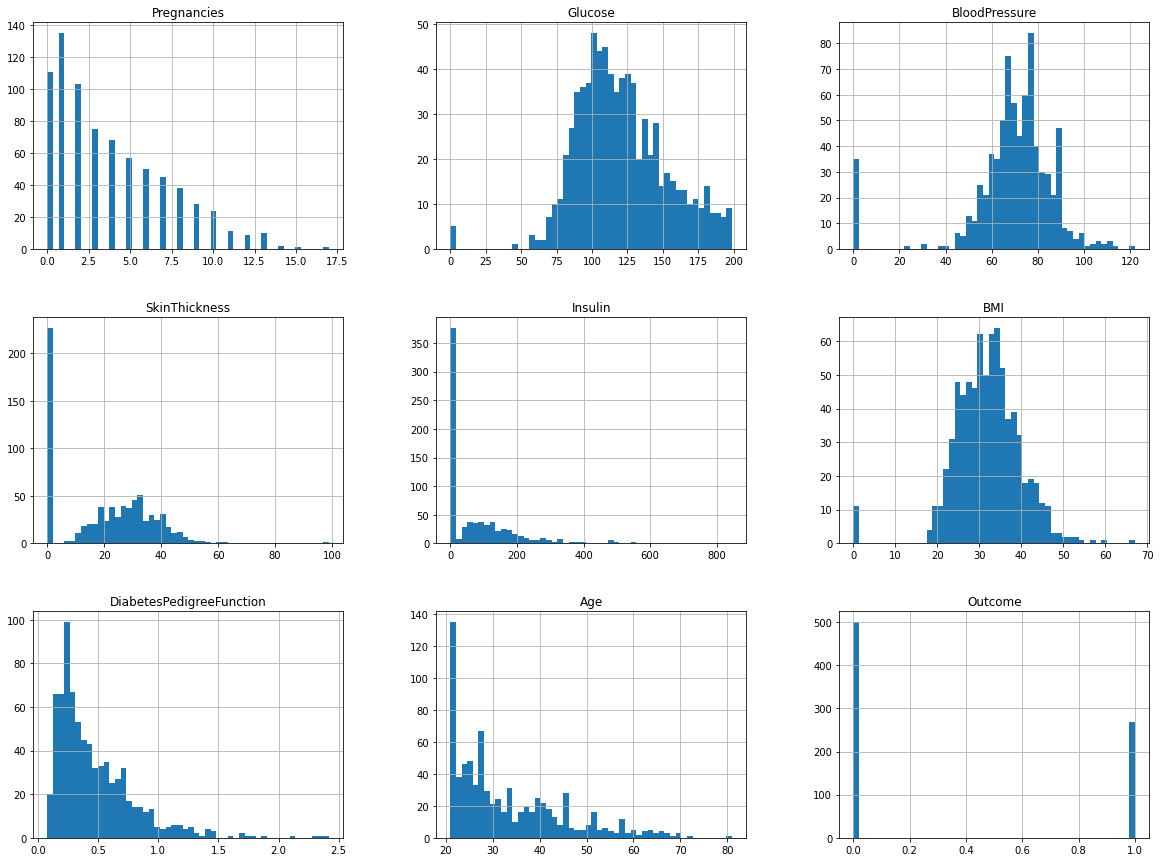

In [9]:
plot_data(dataset)

### 02. Correlation Matrix

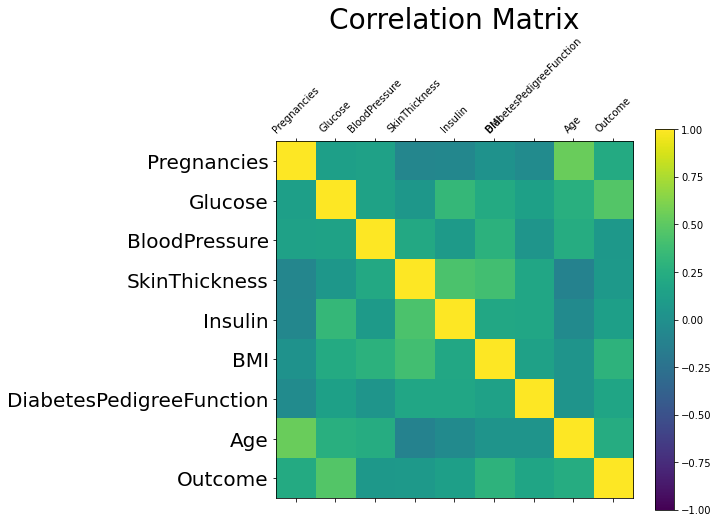

In [10]:
def correlation_matrix(dataframe):
    """Plot out correlation data from a pandas dataframe"""

    # Correlation data 
    corr = dataframe.corr()
    # Correlation matrix with matplotlib
    fig = plt.figure(figsize =(8, 7))

    # Colours the rectangles by correlation value
    #111 stands for 1x1 grid, first subplot
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, vmin=-1, vmax=1)
    fig.colorbar(cax)

    # Plots x-ticks labels
    plt.xticks(range(len(corr.columns)), corr.columns , fontsize =10)
    plt.xticks(rotation=45)
    
    # Plots y-ticks labels
    plt.yticks(range(len(corr.columns)), corr.columns , fontsize = 20)
    plt.title('Correlation Matrix', fontsize = 28)

    # Plots the correlation matrix
    plt.show()
    
    return

correlation_matrix(dataset)

In [11]:
# Correlation data 
corr = dataset.corr()

# Correlation matrix with seaborn (correlation val are -1 to 1, thats why vmin vmax)
# ssb.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

No meaningful correlation found. All features are informative.

### 03. Running and Parameters

##### Run KNN Algorithm

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


'''Run KNN algorithm in pandas dataframe'''

# Create features and labels
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

# Create training (75%) and test (25%) sets 
features_train, features_test , labels_train , labels_test = train_test_split(features, labels, test_size =0.25)

#Set classifier (k=5)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fit data for training into classifier
classifier.fit(features_train , labels_train)

# Predicting with classifier
pred = classifier.predict(features_test)

##### Check Parameters

In [13]:
# Check AOC ARC curve
from sklearn.metrics import roc_auc_score, roc_curve

def aoc_arc_curve(pred, labels_test):
    """Plots the AOC ARC curve and score"""
    auc = roc_auc_score(labels_test, pred)
    print('AUROC score: {:.2f}'.format(auc))

    false_positive_rate, true_positive_rate, thresolds = roc_curve(labels_test, pred)

    plt.figure(figsize=(5, 4), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'y')
    
    plt.plot([0,1],[0,1], linestyle='dotted')

    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = {:.2f}'.format(auc), ha='right', fontsize=12, weight='bold')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    return auc

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def parameter_check(pred, labels_test):
    """Determines accuracy, precision, recall, f1 and aoc arc curve"""
    # Check accuracy
    accuracy = accuracy_score(labels_test , pred)

    # Check precision
    precision = precision_score(labels_test , pred)

    # Check recall
    recall = recall_score(labels_test , pred)

    # Check F1 score
    F1 = f1_score( labels_test , pred)

    print('Accuracy: {:.2f}'.format(accuracy))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1 score: {:.2f}'.format(F1))
    
    auc = aoc_arc_curve(pred, labels_test)
    
    return { 'accuracy': accuracy, 'precision':precision, 'recall':recall, 'fi':F1, 'auc': auc}


Accuracy: 0.69
Precision: 0.54
Recall: 0.57
F1 score: 0.55
AUROC score: 0.66


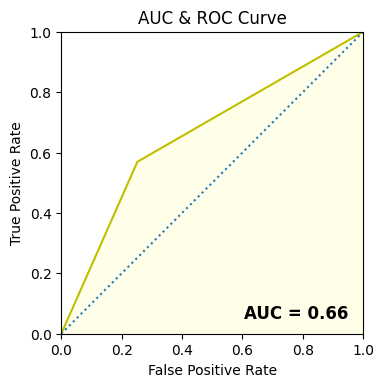

In [15]:
raw_param = parameter_check(pred, labels_test)

### 04. Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

# Standarization
# We need to modify (scale) the testing and the training data, but separately

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

##### Run KNN Algorithm

Accuracy: 0.71
Precision: 0.57
Recall: 0.58
F1 score: 0.58
AUROC score: 0.68


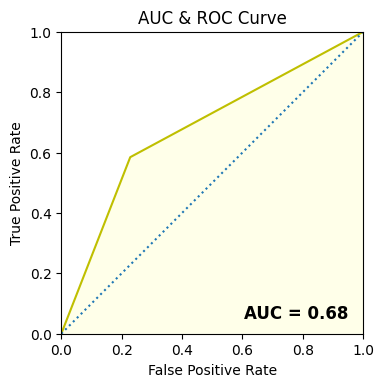

In [17]:
# Fit data for training into classifier
classifier.fit(features_train_scaled , labels_train)

# Predicting with classifier
pred = classifier.predict(features_test_scaled)

# Determine parameters
scaled_param = parameter_check(pred, labels_test)

### 05. Imputation

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(features_train_scaled)
features_train_imputated = imputer.transform(features_train_scaled)

imputer = imputer.fit(features_test_scaled)
features_test_imputated = imputer.transform(features_test_scaled)

##### Run KNN Algorithm

Accuracy: 0.71
Precision: 0.57
Recall: 0.58
F1 score: 0.58
AUROC score: 0.68


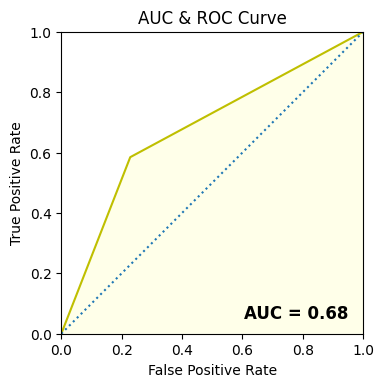

In [19]:
# Fit data for training into classifier
classifier.fit(features_train_imputated , labels_train)

# Predicting with classifier
pred = classifier.predict(features_test_imputated)

# Determine parameters
imputed_param = parameter_check(pred, labels_test)

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value (e. g. 0), or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

### 06. Imablanced Data

In [20]:
# !pip install imblearn

In [21]:
import imblearn
from collections import Counter

#### Up-sampling  _(with `imblearn`)_


Next, we'll create a new DataFrame with an up-sampled minority class. Here are the
steps:

*  First, we'll separate observations from each class into different DataFrames.
* Next, we'll resample the minority class with replacement, setting the number of
samples to match that of the majority class.
* Finally, we'll combine the up-sampled minority class DataFrame with the original
majority class DataFrame.

In [22]:
from imblearn.over_sampling import SMOTE

# Re-sizing the data 
features_train_balanced, labels_train_balanced = SMOTE().fit_resample(features_train_imputated, labels_train)
features_test_balanced, labels_test_balanced = SMOTE().fit_resample(features_test_imputated, labels_test)

##### Run KNN Algorithm

Accuracy: 0.73
Precision: 0.72
Recall: 0.76
F1 score: 0.74
AUROC score: 0.73


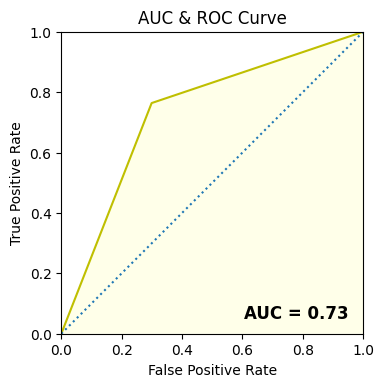

In [23]:
# Fit data for training into classifier
classifier.fit(features_train_balanced , labels_train_balanced)

# Predicting with classifier
pred = classifier.predict(features_test_balanced)

# Determine parameters
upsamp_param = parameter_check(pred, labels_test_balanced)

#### Down-sampling  _(with `imblearn`)_

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Re-sizing the data 
rus = RandomUnderSampler(random_state=0)
features_train_balanced, labels_train_balanced = rus.fit_resample(features_train_imputated, labels_train)
features_test_balanced, labels_test_balanced = rus.fit_resample(features_test_imputated, labels_test)

##### Run KNN Algorithm

Accuracy: 0.68
Precision: 0.69
Recall: 0.65
F1 score: 0.67
AUROC score: 0.68


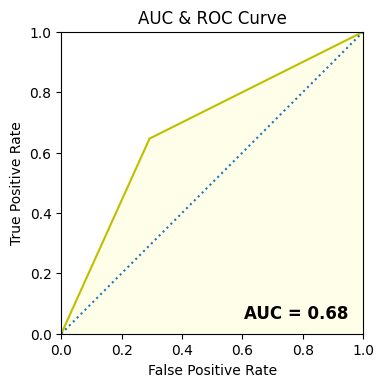

In [25]:
# Fit data for training into classifier
classifier.fit(features_train_balanced , labels_train_balanced)

# Predicting with classifier
pred = classifier.predict(features_test_balanced)

# Determine parameters
downsamp_param = parameter_check(pred, labels_test_balanced)

#### Re-sampling _(with `resample`)_ 
Common steps in up-sampling and down-sampling:

In [26]:
# Make a deepcopy of the training data and add the outcome column
dataset_training = features_train.copy(deep=True)
dataset_training['Outcome'] = labels_train

# Make a deepcopy of the testing data and add the outcome column
dataset_testing = features_test.copy(deep=True)
dataset_testing['Outcome'] = labels_test

# Separate majority and minority classes for training_data
dataset_training_majority = dataset_training[dataset_training.Outcome ==0]
dataset_training_minority = dataset_training[dataset_training.Outcome ==1]

# Separate majority and minority classes for testing_data 
dataset_testing_majority = dataset_testing[dataset_testing.Outcome ==0]
dataset_testing_minority = dataset_testing[dataset_testing.Outcome ==1]

# Scale and impute
# TODO

#### Up-sampling  _(with `resample`)_

In [27]:
from sklearn.utils import resample

# Split data into training and testing 
# Already have: features_train, labels_train, features_test, labels_test

##### Training data

In [28]:
# Up-sample minority class for training data
dataset_training_minority_upsampled = resample(dataset_training_minority,
                                 replace=True, # sample with replacement
                                 n_samples=len(dataset_training_minority),
                                 random_state=123) # reproducible results

dataset_train_upsampled = pd.concat([dataset_training_minority_upsampled,dataset_training_majority])

# Split into features and labels 
features_train_upsampled = dataset_train_upsampled.drop(['Outcome'], axis=1)
labels_train_upsampled = dataset_train_upsampled['Outcome']

##### Testing data

In [29]:
# Up-sample minority class for testing data
dataset_testing_minority_upsampled = resample(dataset_testing_minority,
                                 replace=True, # sample with replacement
                                 n_samples=len(dataset_testing_minority),
                                 random_state=123) # reproducible results

dataset_test_upsampled = pd.concat([dataset_testing_minority_upsampled,dataset_testing_majority])

# Split into features and labels 
features_test_upsampled = dataset_test_upsampled.drop(['Outcome'], axis=1)
labels_test_upsampled = dataset_test_upsampled['Outcome']

In [30]:
# We have: features_train_upsampled, labels_train_upsampled,features_test_upsampled,labels_test_upsampled

##### Run KNN Algorithm

Accuracy: 0.69
Precision: 0.55
Recall: 0.51
F1 score: 0.53
AUROC score: 0.65


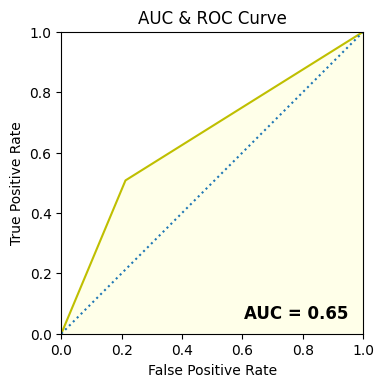

In [31]:
# Fit data for training into classifier
classifier.fit(features_train_upsampled , labels_train_upsampled)

# Predicting with classifier
pred = classifier.predict(features_test_upsampled)

# Determine parameters
upsamp_re = parameter_check(pred , labels_test_upsampled)

Best parameter check is consistently with `resample`, usually up-sampling.

#### Down-sampling  _(with `resample`)_

##### Training data

In [32]:
# Down-sample majority class for training data
dataset_training_majority_downsampled = resample(dataset_training_majority,
                                 replace=True, # sample with replacement
                                 n_samples=len(dataset_training_majority),
                                 random_state=123) # reproducible results

dataset_train_downsampled = pd.concat([dataset_training_majority_downsampled,dataset_training_minority])

# Split into features and labels 
features_train_downsampled = dataset_train_downsampled.drop(['Outcome'], axis=1)
labels_train_downsampled = dataset_train_downsampled['Outcome']

##### Testing data

In [33]:
# Down-sample majority class for training data
dataset_testing_majority_downsampled = resample(dataset_testing_majority,
                                 replace=True, # sample with replacement
                                 n_samples=len(dataset_testing_majority),
                                 random_state=123) # reproducible results

dataset_test_downsampled = pd.concat([dataset_testing_majority_downsampled,dataset_testing_minority])

# Split into features and labels 
features_test_downsampled = dataset_test_downsampled.drop(['Outcome'], axis=1)
labels_test_downsampled = dataset_test_downsampled['Outcome']

In [34]:
# We have: features_train_downsampled, labels_train_downsampled, features_test_downsampled, labels_test_downsampled

##### Run KNN Algorithm

Accuracy: 0.65
Precision: 0.49
Recall: 0.57
F1 score: 0.52
AUROC score: 0.63


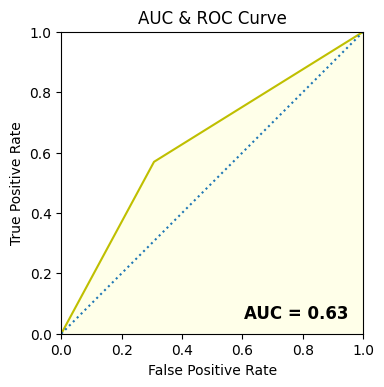

In [35]:
# Fit data for training into classifier
classifier.fit(features_train_downsampled , labels_train_downsampled)

# Predicting with classifier
pred = classifier.predict(features_test_downsampled)

# Determine parameters
downsamp_re = parameter_check(pred, labels_test_downsampled)

### Parameter Comparison

In [36]:
# Plot out different parameters
compare = [raw_param, scaled_param, imputed_param, downsamp_param, upsamp_param, upsamp_re, downsamp_re]
headers_comparison = ['Raw', 'Scaled', 'Imputed', 'Down-sampling (Imblearn)', 'Up-sampling (Imblearn)', 'Up-sampling (Resample)', 'Down-sampling (Resample)']

In [37]:
compare_df = pd.DataFrame(compare)
compare_df["results"]=headers_comparison
compare_df = compare_df.set_index('results', drop=True).rename_axis(None)

In [38]:
compare_df.iplot(kind='bar', width=0.9)

### 10. GridSearchCV 

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [40]:
# Select parameters to check
grid_params = {
    'n_neighbors': [3,5,11, 19],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidian','manhattan']
}

In [ ]:
# Fit algorithm for each parameter selected
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)
gs_results = gs.fit(features_train, labels_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
# Find best fit
print(f'Best score: {gs_results.best_score_}')
print(f'Best estimator: {gs_results.best_estimator_}')
print(f'Best parameters: {gs_results.best_params_}')

### 11. Pipeline

In [ ]:
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.linear_model import Ridge, Lasso
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Setting up a pipeline
pipe = Pipeline([
    ('scaler', None),
    ('imputer', SimpleImputer(missing_values=0)),
    ('upsampler', None),
    ('downsampler', None),
    ('clf', KNeighborsClassifier())
])


In [ ]:
# Parameter grid to search over using grid search
params={
    'imputer__strategy': ['mean', 'median'],
    'upsampler': ['passthrough', 
                  RandomOverSampler(random_state=42), 
                  SMOTENC(categorical_features=[0], random_state=42, k_neighbors=0)
                 ],
    'downsampler':['passthrough', 
                   RandomUnderSampler(random_state=42),
                   TomekLinks()
                  ],
    'scaler':[StandardScaler(), MinMaxScaler()],
    'clf__n_neighbors':[3,5,7,9,11,13],
    'clf__weights':['uniform', 'distance'],
    'clf__metric': ['minkowski', 'manhattan', 'euclidian']
}

# Cross validation
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

# Set up the grid search
gs = GridSearchCV(pipe,params,n_jobs=-1,cv=5)

# Fit gs to training data
gs_results = gs.fit(features_train, labels_train)

# Find best fit
print(f'Best score: {gs_results.best_score_}')
print(f'Best parameters: \n{gs_results.best_params_}')

In [ ]:
# building a dataframe from cross validation data
df_cv_scores=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')

# Get score
print(f'\nScore: {gs.score(features_test, labels_test)}')

# Predict results
labels_preds = gs.predict(features_test)
par = parameter_check(labels_preds, labels_test)